# Simple Linear Regression
### *Predicting Life Expectancy: A Synthetic Example*

In this notebook, I use synthetic data that I generated to illustrate how to manually compute the coefficients of a simple linear regression.

## 1. Load the Data

In [2]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
df = pd.read_csv('../data/life_expectancy_data.csv')

# display first few rows
print(df.head())

   yrs_school   life_exp
0   13.578595  52.713117
1   17.792642  57.841715
2   10.167224  47.758930
3    0.602007  33.257639
4   15.585284  57.082617


## 2. Compute Coefficients

Once we have properly loaded the data, we can simply compute the coefficients with a re-usable function we program:

In [3]:
def SLR_coefficients(X, y):
    """
    Calculate the coefficients for Simple Linear Regression.
    
    Parameters:
    X (array-like): Independent variable.
    y (array-like): Dependent variable.
    
    Returns:
    tuple: Intercept and slope of the regression line.
    """
    n = len(X)
    
    # Calculate slope
    num = np.sum(X * y) - n * np.mean(X) * np.mean(y)
    den = np.sum(X**2) - n * (np.mean(X))**2
    b1 = num / den  # slope

    # Calculate intercept
    b0 = np.mean(y) - b1 * np.mean(X)  # intercept
    
    return b0, b1

Once the function is ready, we compute the two coefficients on our data:

In [13]:
b0_1, b1_1 = SLR_coefficients(df['yrs_school'], df['life_exp'])
print(f"SLR Coefficients\nIntercept (b0): {b0_1}\nSlope (b1): {b1_1}")

SLR Coefficients
Intercept (b0): 37.494628041499226
Slope (b1): 1.0155605359752424


Finally, we realize a plot that we will integrate to the written report:

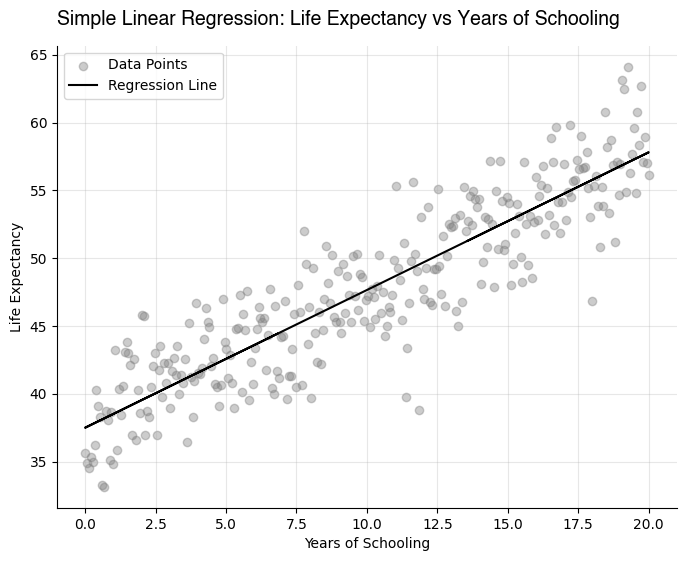

In [11]:
# plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df['yrs_school'], df['life_exp'], color='grey', label='Data Points', alpha=0.4)
ax.plot(df['yrs_school'], b0_1 + b1_1 * df['yrs_school'], color='black', label='Regression Line')

# labels and title
ax.set_xlabel('Years of Schooling')
ax.set_ylabel('Life Expectancy')
ax.set_title('Simple Linear Regression: Life Expectancy vs Years of Schooling',
             family="Helvetica", fontsize=14, loc='left', pad=15)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha=0.3)

# show and save
plt.savefig('../figures/slr_life_expectancy.png', dpi=300, bbox_inches='tight')
plt.show()